In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

load dataset

In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Reza MSI\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }"""

خود تنسرفلو قسمت ترین و تست رو جدا میکنه و ما فقط ذخیره میکنیم توی متغییر

In [3]:
train , test = mnist_dataset['train'] , mnist_dataset['test']

یک دهم از قسمت ترین رو بعنوان سایز ولیدیشن جدا میکنیم

In [4]:
numberOfValidation = 0.1 * mnist_info.splits['train'].num_examples
numberOfValidation

6000.0

فلوت هست و به اینتیجر تبدیلش میکنیم

In [5]:
numberOfValidation = tf.cast(numberOfValidation , tf.int64)
numberOfValidation

<tf.Tensor: shape=(), dtype=int64, numpy=6000>

In [6]:
numberOfTest = mnist_info.splits['test'].num_examples
numberOfTest

10000

In [7]:
numberOfTest = tf.cast(numberOfTest , tf.int64)
numberOfTest

<tf.Tensor: shape=(), dtype=int64, numpy=10000>

سایز ماتریسی عکسامون بزرگه و با تابع زیر اونو اسکیل میکنیم

In [8]:
def scale ( image , label ):
    image = tf.cast(image , tf.float32)
    image /= 255.0
    return image , label

In [9]:
trainAndValidationDataScaled = train.map(scale)
testScaled = test.map(scale)

به دسته های 10000تایی قسمت میکنیم و بعد شافل میکنیم دیتاهارو که داده های رندوم به مدل بدیم و مرتب شده نباشه

In [10]:
bufferSize = 10000
shuffledTrainAndValidationData = trainAndValidationDataScaled.shuffle(bufferSize)

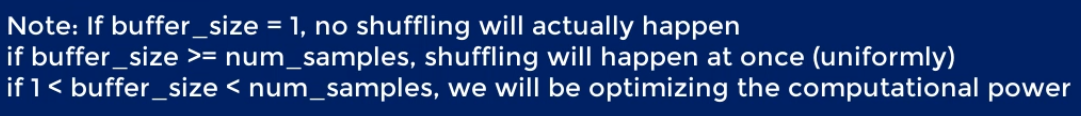

به اندازه ولیدیشنمون از اون جدا میکنیم و میدیم به ولیدیشن و بقیشو میدیم به ترین

In [11]:
ValidationData = shuffledTrainAndValidationData.take(numberOfValidation)
trainData = shuffledTrainAndValidationData.skip(numberOfValidation)

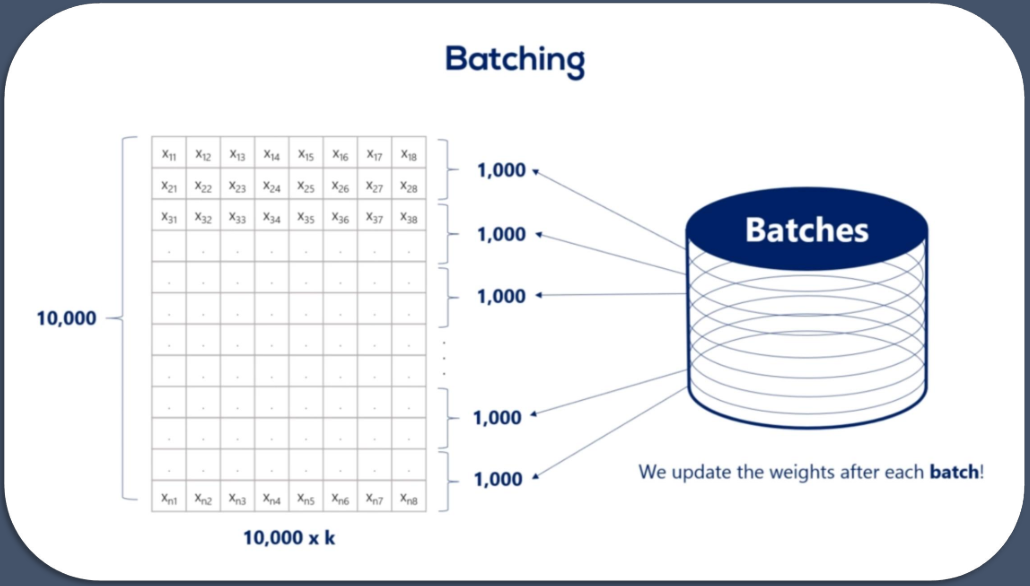

In [12]:
batchSize = 100

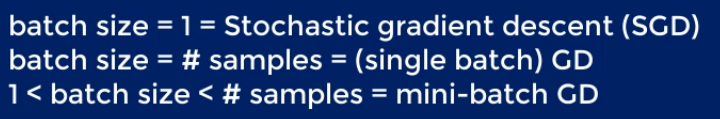

In [13]:
trainData = trainData.batch(batchSize)

In [14]:
ValidationData = ValidationData.batch(numberOfValidation)

In [15]:
testData = testScaled.batch(numberOfTest)

In [16]:
#validation dataset should have the same shape and format as train dataset
validation_inputs, validation_targets = next(iter(ValidationData))

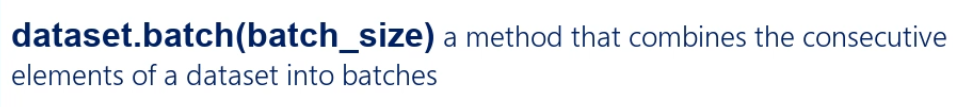

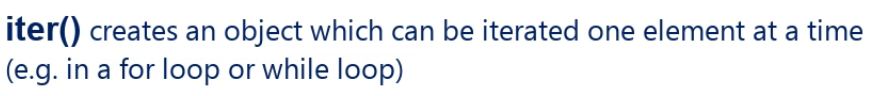

The Python iter() function returns an iterator for the given object.

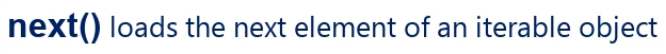

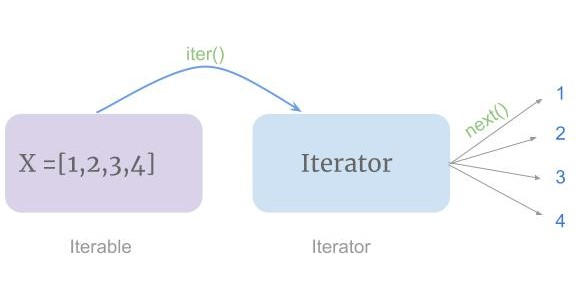

In [17]:
# 28px * 28px = 784
inputSize = 784

# 0 until 9
outputSize = 10

#number of atoms in hidden layers
hiddenLayerSize = 50

# flatten ==> 28*28=784
# flatten ==> reshape 28*28 matrix to 784*1 matrix
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28,28,1) ),
    tf.keras.layers.Dense( hiddenLayerSize , activation='relu' ),
    tf.keras.layers.Dense( hiddenLayerSize , activation='relu' ),
    tf.keras.layers.Dense( outputSize , activation='softmax' )
])

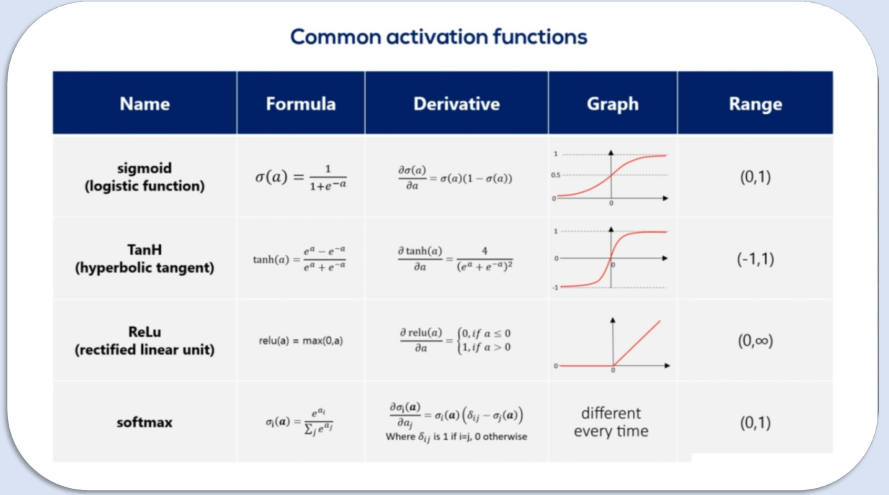

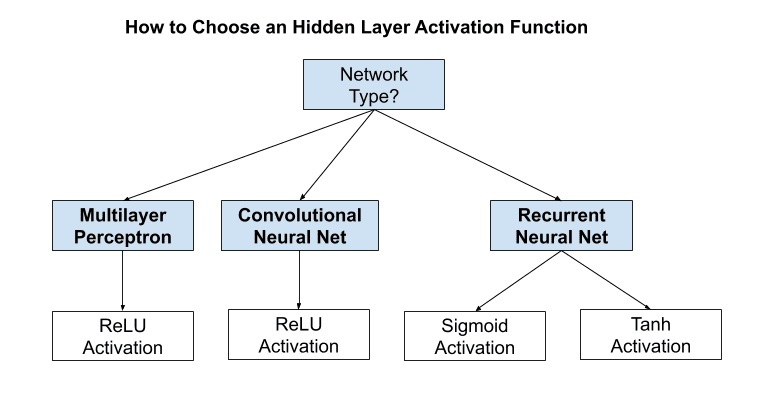

## Choose the optimizer and the loss function

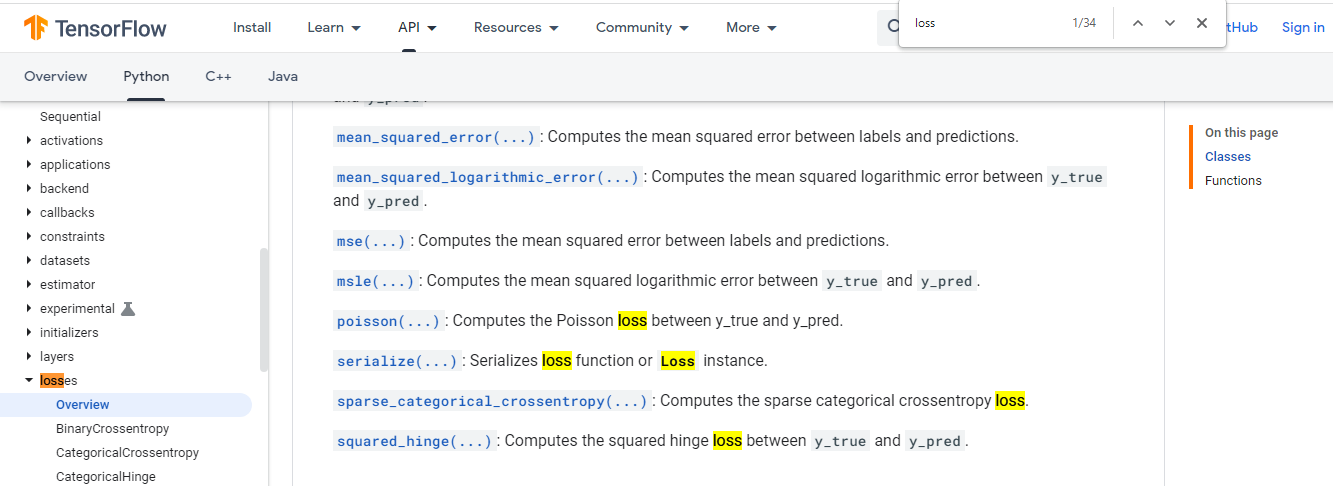

Go to the following address and take a look at different methods and functions that we need here

https://www.tensorflow.org/api_docs/python/tf/keras/losses

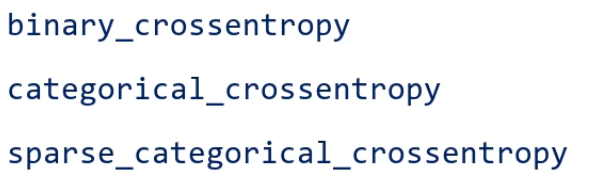

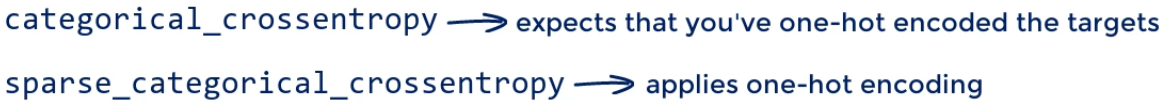

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochSize = 5
model.fit(trainData , epochs=epochSize , validation_data=(validation_inputs, validation_targets) ,verbose=2)

Epoch 1/5
540/540 - 2s - loss: 0.4119 - accuracy: 0.8811 - val_loss: 0.2118 - val_accuracy: 0.9387 - 2s/epoch - 4ms/step
Epoch 2/5
540/540 - 1s - loss: 0.1817 - accuracy: 0.9472 - val_loss: 0.1591 - val_accuracy: 0.9550 - 1s/epoch - 2ms/step
Epoch 3/5
540/540 - 1s - loss: 0.1348 - accuracy: 0.9613 - val_loss: 0.1230 - val_accuracy: 0.9643 - 1s/epoch - 2ms/step
Epoch 4/5
540/540 - 1s - loss: 0.1101 - accuracy: 0.9674 - val_loss: 0.1117 - val_accuracy: 0.9672 - 1s/epoch - 2ms/step
Epoch 5/5
540/540 - 1s - loss: 0.0946 - accuracy: 0.9719 - val_loss: 0.0986 - val_accuracy: 0.9730 - 1s/epoch - 2ms/step


## Test the model
As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset.

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

In [20]:
testLoss , testAccuracy = model.evaluate(testData)
print('Test loss of our model is: {0:.3f}. And our Test accuracy is: {1:.3f}%'.format(testLoss, testAccuracy*100.))

1/1 [==============================] - 0s 236ms/step - loss: 0.1122 - accuracy: 0.9639
Test loss of our model is: 0.112. And our Test accuracy is: 96.390%


Test loss of our model is: 0.104. And our Test accuracy is: 96.960%
Using the initial model and hyperparameters given in this notebook, the final test accuracy should be roughly around 97%.

Each time the code is rerun, we get a different accuracy as the batches are shuffled, the weights are initialized in a different way, etc.

Finally, we have intentionally reached a suboptimal solution, so you can have space to build on it.